### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

#1
df.set_index('total_litres_of_pure_alcohol', inplace=True)
df.sort_index(inplace=True, ascending=False)
print(df.head(10))

#2
print("\nMedie di consumo per tipologia di alcol:")
print(f"Birre: {np.mean(df['beer_servings']):.2f}")
print(f"Vini: {np.mean(df['wine_servings']):.2f}")
print(f"Spiriti: {np.mean(df['spirit_servings']):.2f}")

#3
df["alcohol_index"] = ((df["beer_servings"] + df["wine_servings"] + df["spirit_servings"]) / 3)

#4
print(f"Il paese con l'indice di alcol più alto è: {df.country.iloc[np.argmax(df["alcohol_index"])]}")

#5
condizione = df['beer_servings'] > 100
print(f"I paesi che consumano più di 100 birre:\n {df.country[condizione]}")








                                         country  beer_servings  \
total_litres_of_pure_alcohol                                      
14.4                                     Belarus            142   
12.9                                   Lithuania            343   
12.4                                     Andorra            245   
11.9                                     Grenada            199   
11.8                              Czech Republic            361   
11.8                                      France            127   
11.5                          Russian Federation            247   
11.4                                     Ireland            313   
11.4                                    Slovakia            196   
11.4                                  Luxembourg            236   

                              spirit_servings  wine_servings  
total_litres_of_pure_alcohol                                  
14.4                                      373             42  
12.9  

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

Analisi reddito per location:
                               count      mean            std       min  \
job_location                                                              
Madison, SD                      1.0  960000.0            NaN  960000.0   
Pretoria, South Africa           1.0  890000.0            NaN  890000.0   
Belarus                          1.0  400000.0            NaN  400000.0   
Eagan, TN                        1.0  375000.0            NaN  375000.0   
Dodgeville, WI                   1.0  375000.0            NaN  375000.0   
Boston, NY                       1.0  300000.0            NaN  300000.0   
Russia                           4.0  292500.0   34034.296428  250000.0   
Liberty, NC                      2.0  250000.0  176776.695297  125000.0   
San Francisco, CA  (+1 other)    2.0  246509.0   33246.746638  223000.0   
Denver, NC                       1.0  240000.0            NaN  240000.0   

                                    25%       50%       75%       max

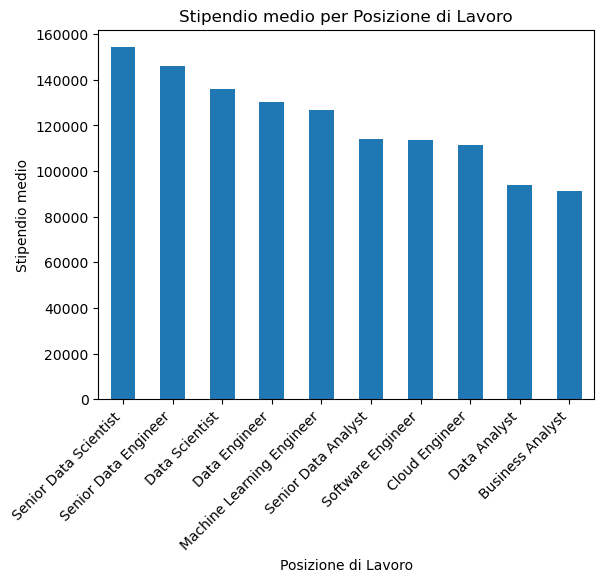

In [3]:
import pandas as pd
import numpy as np
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

analisi = df.groupby('job_location')['salary_year_avg'].describe()
print("Analisi reddito per location:")
print(analisi.sort_values('mean', ascending=False).head(10))

#2
df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Stipendio medio per Posizione di Lavoro')
plt.xlabel('Posizione di Lavoro')
plt.ylabel('Stipendio medio')
plt.show()